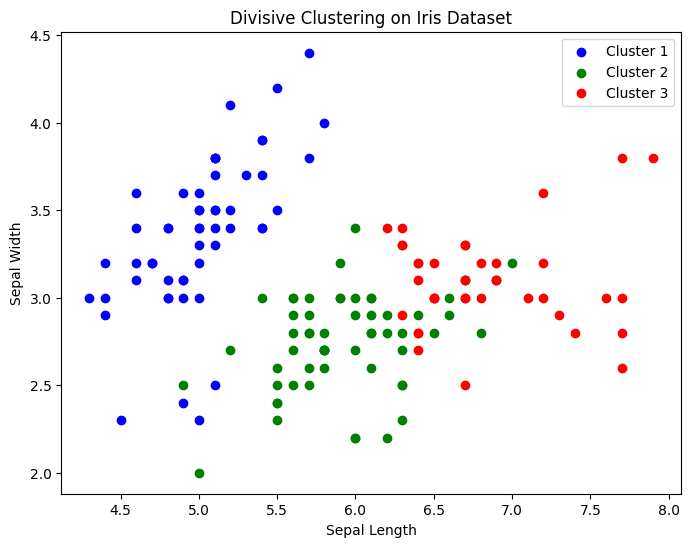

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Custom function for divisive clustering using K-Means
def divisive_clustering(X, n_clusters=3):
    # Start with one cluster (everything in one cluster)
    clusters = [X]
    # Recursively divide the clusters
    while len(clusters) < n_clusters:
        # Pick a cluster to split (pick the largest one for efficiency)
        cluster_to_split = max(clusters, key=len)
        clusters.remove(cluster_to_split)
        
        # Use KMeans to split the selected cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(cluster_to_split)
        cluster_1 = cluster_to_split[kmeans.labels_ == 0]
        cluster_2 = cluster_to_split[kmeans.labels_ == 1]
        
        # Add the new clusters to the list
        clusters.append(cluster_1)
        clusters.append(cluster_2)
    
    return clusters

# Apply divisive clustering (split the data into 3 clusters)
clusters = divisive_clustering(X, n_clusters=3)

# Visualize the clusters (using the first two features for 2D visualization)
plt.figure(figsize=(8, 6))

# Plot each cluster
colors = ['blue', 'green', 'red']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}', color=colors[i])

# Add labels and title
plt.title("Divisive Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Show the legend
plt.legend()

# Show the plot
plt.show()
